# Kaggle Titanic Survival Prediction

The following is a solution to the Kaggle's Titanic survival rate prediction competition.
<br>Note: Some feature names are different from the original names but that is all! All the information they encompass are the same.

# Import Libraries

In [22]:
# pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn import model_selection, svm, tree, linear_model, ensemble, metrics
from xgboost import XGBClassifier

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Load and Process the Data

Below loads the dataset file `dataset.csv`. This file is a complete file and a test set should be taken from it randomly!

In [23]:
# get data as a DataFrame
full_df = pd.read_csv("dataset.csv")

In [24]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passenger_id           891 non-null int64
ticket                 891 non-null object
ticket_cost            891 non-null float64
port                   889 non-null object
class                  891 non-null int64
cabin_number           204 non-null object
full_name              891 non-null object
sex                    891 non-null object
age                    714 non-null float64
siblings_or_spouse     891 non-null int64
parents_or_children    891 non-null int64
survived               891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
full_df.head(10)

,passenger_id,ticket,ticket_cost,port,class,cabin_number,full_name,sex,age,siblings_or_spouse,parents_or_children,survived
0,1,A/5 21171,7.2500,S,3,NaN,"Braund, Mr. Owen Harris",male,22.0,1,0,0
1,2,PC 17599,71.2833,C,1,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,1
2,3,STON/O2. 3101282,7.9250,S,3,NaN,"Heikkinen, Miss. Laina",female,26.0,0,0,1
3,4,113803,53.1000,S,1,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1
4,5,373450,8.0500,S,3,NaN,"Allen, Mr. William Henry",male,35.0,0,0,0
5,6,330877,8.4583,Q,3,NaN,"Moran, Mr. James",male,NaN,0,0,0
6,7,17463,51.8625,S,1,E46,"McCarthy, Mr. Timothy J",male,54.0,0,0,0
7,8,349909,21.0750,S,3,NaN,"Palsson, Master. Gosta Leonard",male,2.0,3,1,0
8,9,347742,11.1333,S,3,NaN,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,1
9,10,237736,30.0708,C,2,NaN,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,1


As can be seen above, we have 891 data points. Some of the variables are floating point numbers and some of them are strings. It is seen that port, class, sex, siblings_or_spouse, parents_or_children and survived variables are categorical. 


# 2. Exploratory Data Analysis

## 2.1 Analyze the Data for Errors

In [26]:
print(full_df.isnull().sum())

passenger_id             0
ticket                   0
ticket_cost              0
port                     2
class                    0
cabin_number           687
full_name                0
sex                      0
age                    177
siblings_or_spouse       0
parents_or_children      0
survived                 0
dtype: int64


In [27]:
full_df.describe()

,passenger_id,ticket_cost,class,age,siblings_or_spouse,parents_or_children,survived
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,32.204208,2.308642,29.699118,0.523008,0.381594,0.383838
std,257.353842,49.693429,0.836071,14.526497,1.102743,0.806057,0.486592
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,7.910400,2.000000,NaN,0.000000,0.000000,0.000000
50%,446.000000,14.454200,3.000000,NaN,0.000000,0.000000,0.000000
75%,668.500000,31.000000,3.000000,NaN,1.000000,0.000000,1.000000
max,891.000000,512.329200,3.000000,80.000000,8.000000,6.000000,1.000000


1. From the 12 features we have (including the target), 3 have missing
observations (port, cabin_number and age). So, in the data cleaning part, I will handle the missing data for these
variables.
2. passenger_id seems to be there for the identification of the persons so we can drop out that in our analysis as it is just an index.
3. ticket_cost variable seems to hold the price of the tickets for each person.
4. class is a categorical variable indicating the classes of the passengers in the journey.
5. age variable is a continuous variable and holds the ages of the passengers. It ranges from 3 months babies to 80 years olds.
6. siblings_or_spouse and parents_or_children variables indicate whether the passenger attends the journey with anyone in his/her family.
7. survived is the target variable that I will try to predict.
8. I will not use ticket in my analysis and convert cabin_number to a categorical one.

## 2.2 Exploratory Data Analysis

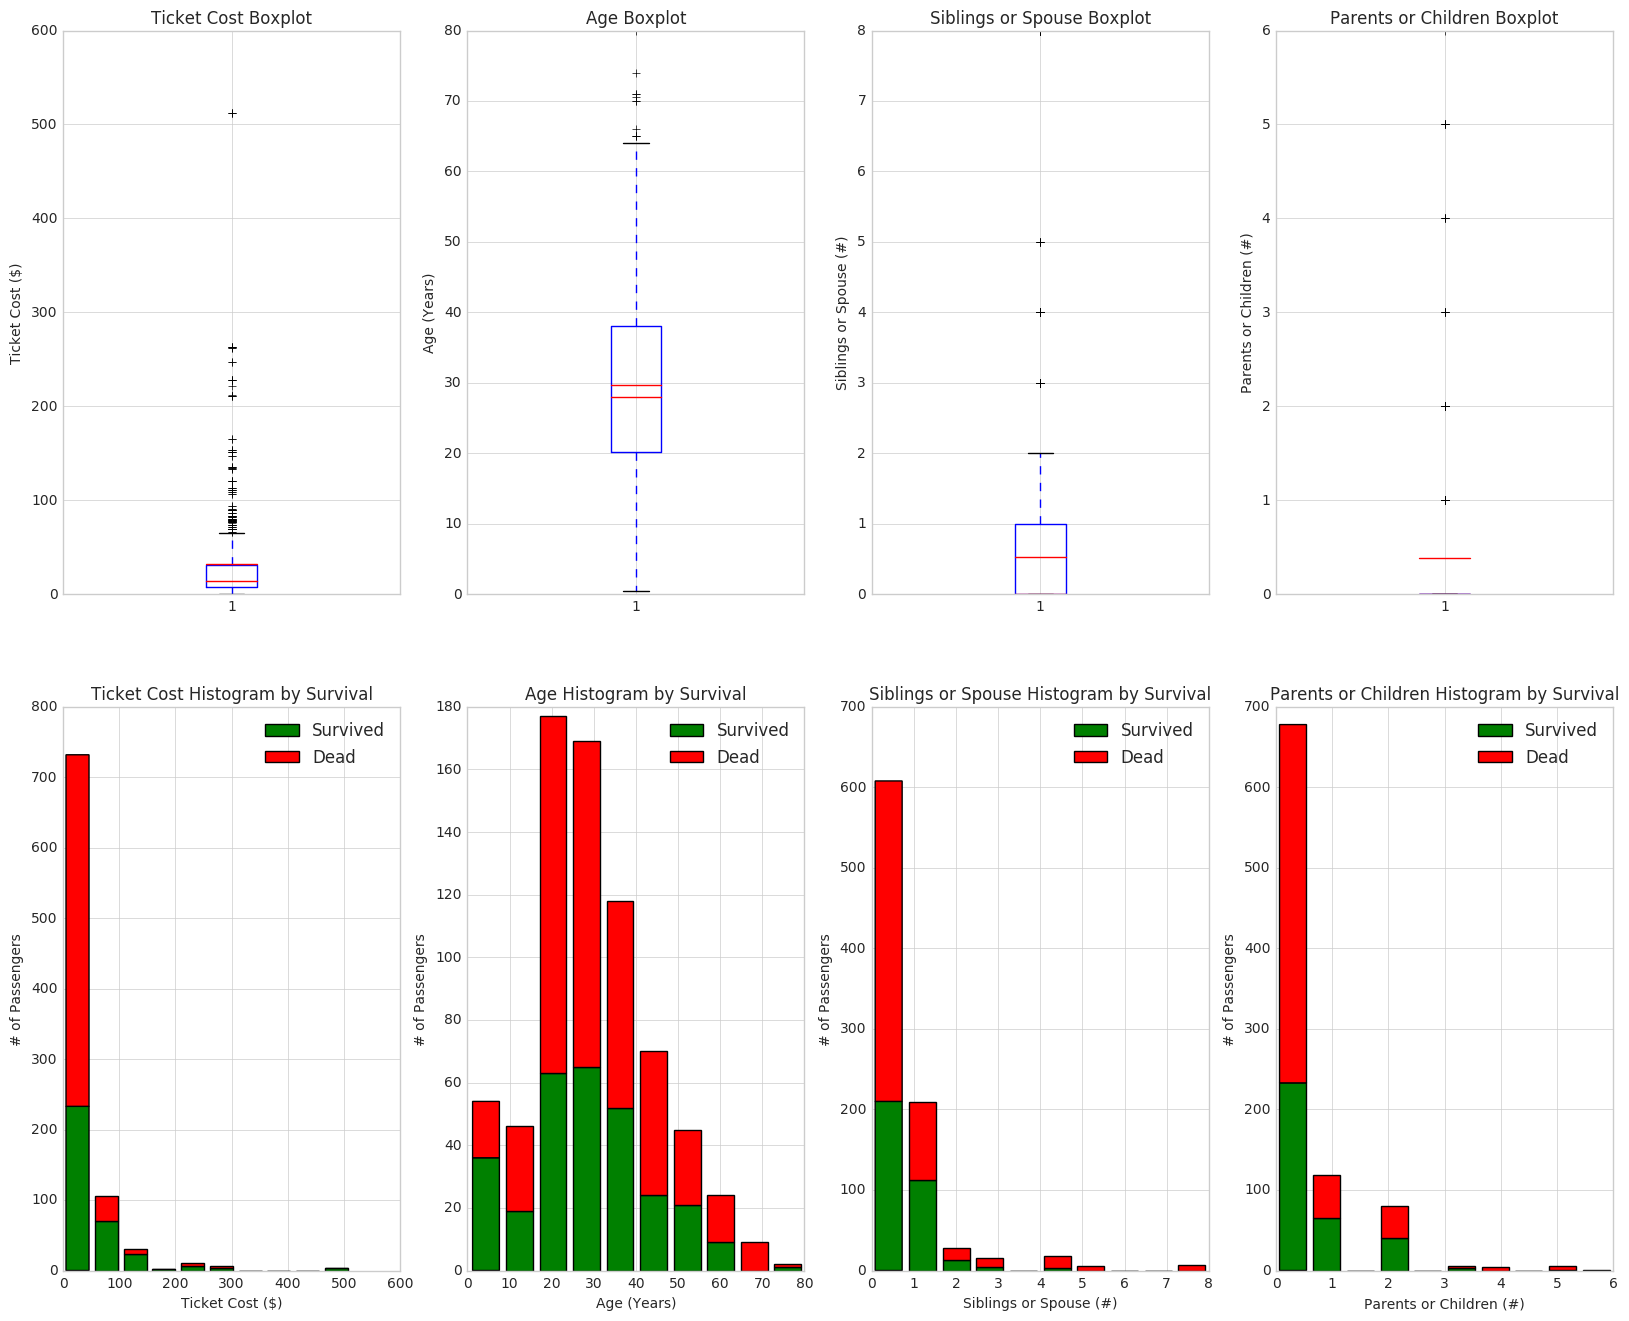

In [28]:
# below graphes the distributions of the data we have
plt.figure(figsize=[20,16])

plt.subplot(241)
plt.boxplot(x=full_df['ticket_cost'], showmeans = True, meanline = True)
plt.title('Ticket Cost Boxplot')
plt.ylabel('Ticket Cost ($)')

plt.subplot(242)
plt.boxplot(full_df[full_df['age'].isnull()==False]['age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(243)
plt.boxplot(full_df['siblings_or_spouse'], showmeans = True, meanline = True)
plt.title('Siblings or Spouse Boxplot')
plt.ylabel('Siblings or Spouse (#)')

plt.subplot(244)
plt.boxplot(full_df['parents_or_children'], showmeans = True, meanline = True)
plt.title('Parents or Children Boxplot')
plt.ylabel('Parents or Children (#)')

plt.subplot(245)
plt.hist(x = [full_df[full_df['survived']==1]['ticket_cost'], full_df[full_df['survived']==0]['ticket_cost']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Ticket Cost Histogram by Survival')
plt.xlabel('Ticket Cost ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(246)
plt.hist(x = [full_df[(full_df['survived']==1) & (full_df['age'].isnull()==False)]['age'], full_df[(full_df['survived']==0) & (full_df['age'].isnull()==False)]['age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(247)
plt.hist(x = [full_df[full_df['survived']==1]['siblings_or_spouse'], full_df[full_df['survived']==0]['siblings_or_spouse']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Siblings or Spouse Histogram by Survival')
plt.xlabel('Siblings or Spouse (#)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(248)
plt.hist(x = [full_df[full_df['survived']==1]['parents_or_children'], full_df[full_df['survived']==0]['parents_or_children']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Parents or Children Histogram by Survival')
plt.xlabel('Parents or Children (#)')
plt.ylabel('# of Passengers')
plt.legend()

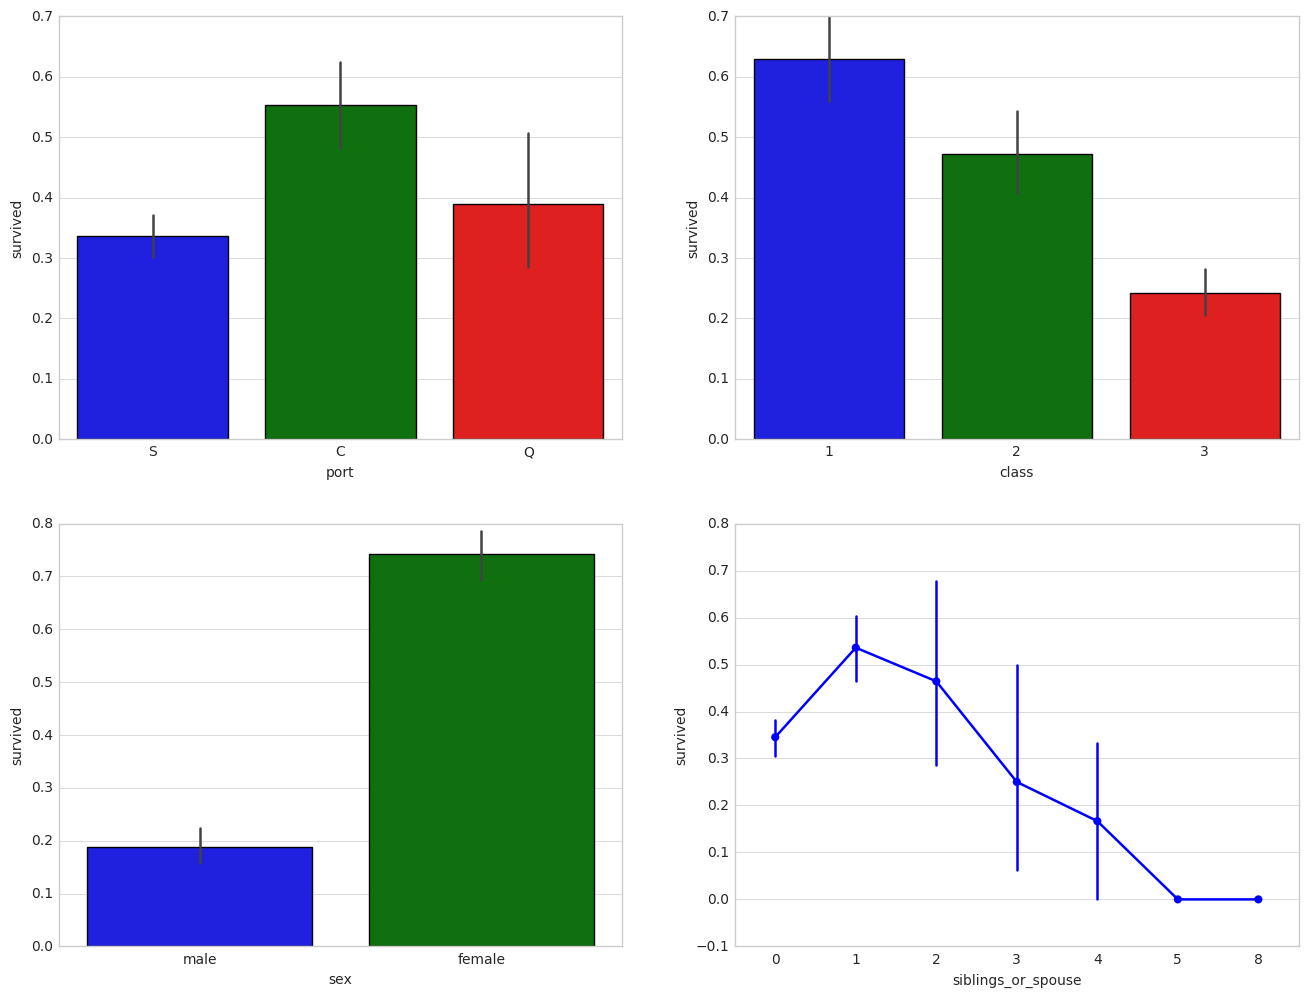

In [29]:
#below graphes some of the individual features by survived
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.barplot(x = 'port', y = 'survived', data=full_df, ax = saxis[0,0])
sns.barplot(x = 'class', y = 'survived', order=[1,2,3], data=full_df, ax = saxis[0,1])
sns.barplot(x = 'sex', y = 'survived', data=full_df, ax = saxis[1,0])
sns.pointplot(x = 'siblings_or_spouse', y = 'survived',  data=full_df, ax = saxis[1,1])


1. It is clear that port, class, sex and siblings_or_spouse variables vary across their categories. Since, the variance is apparent for all of them, it implies that these variables would be useful in predicting the survival as they have information. For example, female passengers are more likely to survive than male passengers. Probaby, the females are favored in the rescue efforts. Similarly, the passengers who have more relatives in the ship are less likely to be survived. This is probably due to their efforts to rescue other family members. First class passengers are more likely to survive than the others and the second class passengers are more likely to survive than the third class passengers. This is probably due to the fact that higher class passengers reside on the upper parts of the ship and they find a greater chance to escape from the ship. They may also be favored in the rescue efforts due to their dignity perception.
2. I will combine siblings_or_spouse and parents_or_children variables into one by summing them up, since they exhibits similar variability as can be seen from the histograms. Combining will help to increase the statistical powers of the models.
3. Thinking variables like ticket_cost and age as continuous doesn't make too much sense. Instead I will make them categorical by assigning them to bins. For example,rather than considering one point of increase in age 17 to 18 has some effects on the target variable, we can think that middle aged passengers are more likely to survive than children and old people. Similar reasoning can also be made regarding the ticket_cost.

## 2.3 Correlation Analysis

In [30]:
# Categorical Variable Correlations by Survival using group by
for col in [i for i in list(full_df) if i not in ['passenger_id','ticket', 'cabin_number','full_name','survived']]:
    if full_df[col].dtype != 'float64' :
        print('Survival Correlation by:', col)
        print(full_df[[col, 'survived']].groupby(col, as_index=False).mean())
        print('\nSurvival Cross Tabulation by:', col)
        print(pd.crosstab(full_df[col],full_df['survived']))
        print('-'*40, '\n')

Survival Correlation by: port
  port  survived
0    C  0.553571
1    Q  0.389610
2    S  0.336957

Survival Cross Tabulation by: port
survived    0    1
port              
C          75   93
Q          47   30
S         427  217
---------------------------------------- 

Survival Correlation by: class
   class  survived
0      1  0.629630
1      2  0.472826
2      3  0.242363

Survival Cross Tabulation by: class
survived    0    1
class             
1          80  136
2          97   87
3         372  119
---------------------------------------- 

Survival Correlation by: sex
      sex  survived
0  female  0.742038
1    male  0.188908

Survival Cross Tabulation by: sex
survived    0    1
sex               
female     81  233
male      468  109
---------------------------------------- 

Survival Correlation by: siblings_or_spouse
   siblings_or_spouse  survived
0                   0  0.345395
1                   1  0.535885
2                   2  0.464286
3                   3  0.250000

1. Port C, Class 0 and females  exhibits more survival rates than the others.
2. Passengers that have less relatives (but not zero) are more likely to survive.

# 3. Data Cleaning

In [31]:
# I will handle the missing points for age and port
# Since I will use cabin_number as a dummy, I am not filling it out.
# complete missing age with median
full_df['age'].fillna(full_df['age'].median(), inplace = True)

# complete port with mode
full_df['port'].fillna(full_df['port'].mode()[0], inplace = True)

#delete the variables that I will not use in my models
drop_column = ['passenger_id', 'ticket']
full_df.drop(drop_column, axis=1, inplace = True)

print(full_df.isnull().sum())


ticket_cost              0
port                     0
class                    0
cabin_number           687
full_name                0
sex                      0
age                      0
siblings_or_spouse       0
parents_or_children      0
survived                 0
dtype: int64


In [32]:
full_df.describe()

,ticket_cost,class,age,siblings_or_spouse,parents_or_children,survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,32.204208,2.308642,29.361582,0.523008,0.381594,0.383838
std,49.693429,0.836071,13.019697,1.102743,0.806057,0.486592
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,7.910400,2.000000,22.000000,0.000000,0.000000,0.000000
50%,14.454200,3.000000,28.000000,0.000000,0.000000,0.000000
75%,31.000000,3.000000,35.000000,1.000000,0.000000,1.000000
max,512.329200,3.000000,80.000000,8.000000,6.000000,1.000000


The box plots above show that some variables have outliers. But I will also make continuous variables categorical. By doing so, I am automatically handling the outliers!

# 4. Feature Engineering

In [33]:
#Create new feature family_size as a combination of siblings_or_spouse and parents_or_children

full_df['family_size'] = full_df['siblings_or_spouse'] + full_df['parents_or_children'] + 1

#Create new feature IsAlone from family_size
full_df['is_alone'] = 0
full_df.loc[full_df['family_size'] == 1, 'is_alone'] = 1

full_df['sex'] = full_df['sex'].map( {'female': 0, 'male': 1} ).astype(int)

full_df['port'] = full_df['port'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#making ticket_cost categorical based on quartiles
full_df.loc[ full_df['ticket_cost'] <= 7.91, 'ticket_cost'] = 0
full_df.loc[(full_df['ticket_cost'] > 7.91) & (full_df['ticket_cost'] <= 14.454), 'ticket_cost'] = 1
full_df.loc[(full_df['ticket_cost'] > 14.454) & (full_df['ticket_cost'] <= 31), 'ticket_cost']   = 2
full_df.loc[ full_df['ticket_cost'] > 31, 'ticket_cost'] = 3
full_df['ticket_cost'] = full_df['ticket_cost'].astype(int)

#making age categorical based on quartiles
full_df.loc[ full_df['age'] <= 22, 'age'] = 0
full_df.loc[(full_df['age'] > 22) & (full_df['age'] <= 28), 'age'] = 1
full_df.loc[(full_df['age'] > 28) & (full_df['age'] <= 35), 'age'] = 2
full_df.loc[ full_df['age'] > 35, 'age'] = 3
full_df['age'] = full_df['age'].astype(int)

#create a new variable has_cabin from the cabin_number
full_df['has_cabin'] = full_df["cabin_number"].apply(lambda x: 0 if type(x) == float else 1)

full_df.describe()

,ticket_cost,port,class,sex,age,siblings_or_spouse,parents_or_children,survived,family_size,is_alone,has_cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,1.505051,0.361392,2.308642,0.647587,1.379349,0.523008,0.381594,0.383838,1.904602,0.602694,0.228956
std,1.118148,0.635673,0.836071,0.477990,1.114652,1.102743,0.806057,0.486592,1.613459,0.489615,0.420397
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000
max,3.000000,2.000000,3.000000,1.000000,3.000000,8.000000,6.000000,1.000000,11.000000,1.000000,1.000000


In [34]:
#delete the features previously stated to exclude in dataset
drop_column = ['full_name', 'cabin_number', 'siblings_or_spouse','parents_or_children']
full_df.drop(drop_column, axis=1, inplace = True)

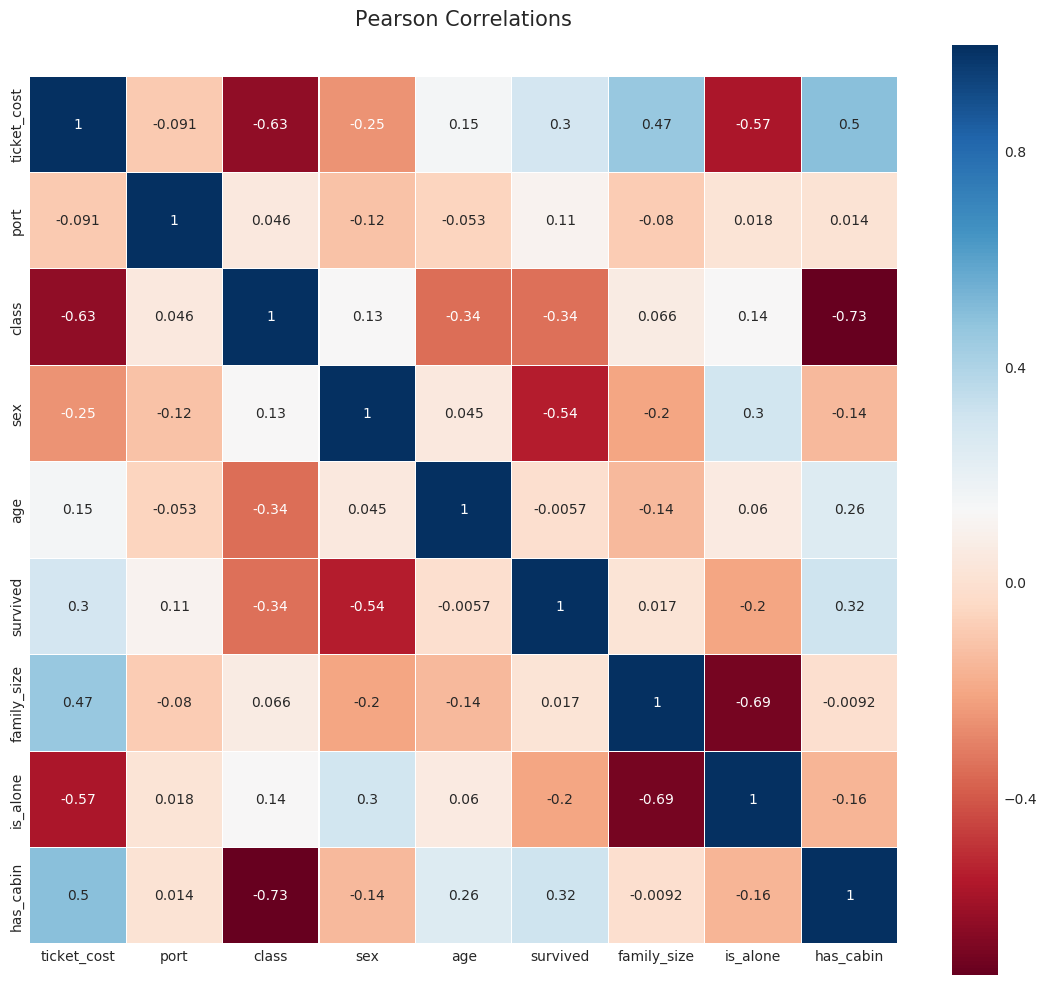

In [35]:
#below I sketch the pearson correlation matrix
corr_df = full_df
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlations', y=1.05, size=15)
sns.heatmap(full_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

1. It is clear that sex is the most correlated feature with the survived.
2. Class and ticket_cost's correlations with survived is around 0.3
3. The newly built features has_cabin and is_alone are also correlated with survived with coefficients 0.32 and -0.2. This implies that these engineered features might be useful in the prediction of survival. This indicates the importance of feature engineering!
4. Other than survived (the target variable), some features are also correlated with each other. For example, ticket_cost and class are highly correlated.Similarly class and has_cabin are also highly correlated. However, since these correlations are not perfect, I will use each of these variables in my model training.
5. Some other interesting observations can also be derived. For example the correlation between sex and is_alone is 0.3. This implies that alone passengers are usually the male ones. Similar observations are present for other variables also.

# 5. Creating Datasets

In [36]:
#split the original data randomly to training and test set.
SEED = 478653347
train, test = model_selection.train_test_split(full_df, test_size=0.30, random_state=SEED)
#below randomly splits the training data for cross validation
cv_split = model_selection.ShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 1532)

X_train = train.drop("survived",axis=1)
Y_train = train["survived"]
X_test  = test.drop("survived",axis=1)
Y_test = test['survived']

Above, I first seperate a randomly selected test set (30% of the data set) and then shuffle the remaining training data for 5 fold cross-validation purposes.

# 6. Model Selection

In [37]:
models = [
        linear_model.LogisticRegressionCV(),
        svm.SVC(probability=True),
        tree.DecisionTreeClassifier(),
    
        ensemble.AdaBoostClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier(),
        XGBClassifier() 
       ]

1. Above, I choose my model from a set of potential models. For demonstration purposes, I included a linear model (logistic regression), support vector classifier, a decision tree classifier and some ensemble methods. For illustration of using ensemble methods I've included AdaBoost classifier, Gradient Boosting Classifier, Random Forest Classifier and XGBoost Classifier. 
2. Below, I will select my model according to the cross validation results.
3. From now on, I will use 'accuracy' as the metric for the evaluation for the simplicity of its interpretation. One can also use something like precision, f1 score, area under ROC curve, gini, entropy or something similar.

In [38]:
#create table to compare metrics
table_columns = ['Model Name', 'Model Parameters','Model Train Accuracy Mean', 'Model Validation Accuracy Mean','Time']
table_compare = pd.DataFrame(columns = table_columns)

In [39]:
row_index = 0
for model in models:

    model_name = model.__class__.__name__
    table_compare.loc[row_index, 'Model Name'] = model_name
    table_compare.loc[row_index, 'Model Parameters'] = str(model.get_params())
    
    #score model with cross validation
    cv_results = model_selection.cross_validate(model, X_train, Y_train, scoring='accuracy', cv= cv_split)

    table_compare.loc[row_index, 'Time'] = cv_results['fit_time'].mean()
    table_compare.loc[row_index, 'Model Train Accuracy Mean'] = cv_results['train_score'].mean()
    table_compare.loc[row_index, 'Model Validation Accuracy Mean'] = cv_results['test_score'].mean()   
    
    row_index+=1

    
#sort and print the table
table_compare.sort_values(by = ['Model Validation Accuracy Mean'], ascending = False, inplace = True)
table_compare

,Model Name,Model Parameters,Model Train Accuracy Mean,Model Validation Accuracy Mean,Time
6,XGBClassifier,"{'colsample_bylevel': 1, 'base_score': 0.5, 'r...",0.863761,0.829947,0.0152215
4,GradientBoostingClassifier,"{'max_features': None, 'random_state': None, '...",0.873853,0.826738,0.0532047
1,SVC,"{'tol': 0.001, 'verbose': False, 'coef0': 0.0,...",0.829817,0.816043,0.0294015
3,AdaBoostClassifier,"{'learning_rate': 1.0, 'n_estimators': 50, 'ba...",0.812385,0.802139,0.0627272
5,RandomForestClassifier,"{'max_features': 'auto', 'random_state': None,...",0.909174,0.793583,0.0140809
0,LogisticRegressionCV,"{'fit_intercept': True, 'tol': 0.0001, 'dual':...",0.807798,0.793583,0.102258
2,DecisionTreeClassifier,"{'max_features': None, 'random_state': None, '...",0.911468,0.789305,0.00182214


1. The best model according to the validation set accuracy is the XGBoost Classifier. Support Vector Classifier and Gradient Boosting Classifier also achieved similar levels of accuracy.
2. In the training set, best accuracy is achieved by DecisionTree classifier as decision trees are more likely to overfit the data. Still, the lowest accuracy in the validation set is also that classifier's.

## 6.1 Model Evaluation

In [40]:
clf = XGBClassifier().fit(X_train, Y_train, eval_metric = metrics.accuracy_score)
sc = clf.score(X_test, Y_test)
print("Test Score: {:.2f}". format(sc*100))

Test Score: 78.36


The model achieved 78.36 percent accuracy! It is obvious that this is lower than the accuracies in the training set and the validation set. This is because the information in those sets are used when the model is trained. If we solely rely upon those metrics, then our models suffer from overfitting. So, the final metric we should consider when evaluating a method is the one that is derived in the test set which is not used at all in the training process.

# 7. Further Improvements of the Model

In [41]:
# This includes some values for the hyperparameters of XGBoost Classifier for tuning

param_grid = {'n_estimators': [100, 200,300,500,1000],'learning_rate': [0.1, 0.05, 0.01, 0.001], 
    'max_depth':range(3,10,2)}
#below is a more advanced tuning parameters, but computationally more intensive.
'''
param_grid = {'n_estimators': [100, 200,300,500,1000],'learning_rate': [0.1, 0.05, 0.01, 0.001], 
    'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2), 'gamma':[i/10.0 for i in range(0,5)], 
    'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)]}
'''
#fit GBC model on survived
est = XGBClassifier()
gbr1 = model_selection.GridSearchCV(est, param_grid, n_jobs=-1, cv=cv_split).fit(X_train, Y_train, eval_metric = metrics.accuracy_score)
test_sc = gbr1.score(X_test, Y_test)

In [42]:
#print the best parameters of the XGBoost Classifier
print('Best Parameters: ', gbr1.best_params_)
#print the training score
print("Training Score Mean: {:.2f}". format(gbr1.cv_results_['mean_train_score'][gbr1.best_index_]*100)) 
#print the validation score
print("Validation Score Mean: {:.2f}". format(gbr1.cv_results_['mean_test_score'][gbr1.best_index_]*100))
#print the test score
print("Test Score: {:.2f}". format(test_sc*100))

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5}
Training Score Mean: 88.76
Validation Score Mean: 83.32
Test Score: 79.48


Since XGBoost Classifier achieved the best performance in the cross validation, I've chosen it and tune the hyperparameters in the training set using cross-validation. Although, tuning all the models would be the desired approach, it is computationally very expensive. So, I only include the best performing model here from the previous section.
Here, I tuned some hyperparameters of XGBoost algorithm using the training set and cross validation. The previous model was run with default parameter values and it achieved an accuracy level of 78.36. However, after I tuned the hyperparameters, the accuracy has increased to 79.48.
As the output of the previous cell indicates the best parameters of the model are:
learning_rate = 0.1
maximum depth = 5
number of estiators = 100

# 8. References
Here I note some very nice solutions of the same task from Kaggle kernels. I am heavily inspired by them.
1. https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
2. https://www.kaggle.com/omarelgabry/a-journey-through-titanic
3. https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy